# Visualize river classification system

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import matplotlib
import pickle
import cmocean
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm

%matplotlib notebook

###### Parameters:

In [3]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# runoff period:
rf_year  = 2015
rf_month = 8    # september 

# colours:
c_continent = '#ce9169'
c_glacier   = '#36ab92'
c_other     = '#a6a6a6'

###### Load files:

River runoff forcing

In [4]:
rf_file = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+\
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y'+str(rf_year)+'.nc','r')
lon_rf  = np.array(rf_file.variables['nav_lon'])
lat_rf  = np.array(rf_file.variables['nav_lat'])
rf      = np.array(rf_file.variables['runoff'][rf_month])

# Place NaNs where there is no runoff
rf[rf == 0]       = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

River classification file
1. Glaciers
2. Continental
3. Other

In [6]:
ncd         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class-202005.nc')
river_class = np.array(ncd.variables['rclass'])

Meshmask

In [5]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

##### Map with bathymetry background

<IPython.core.display.Javascript object>


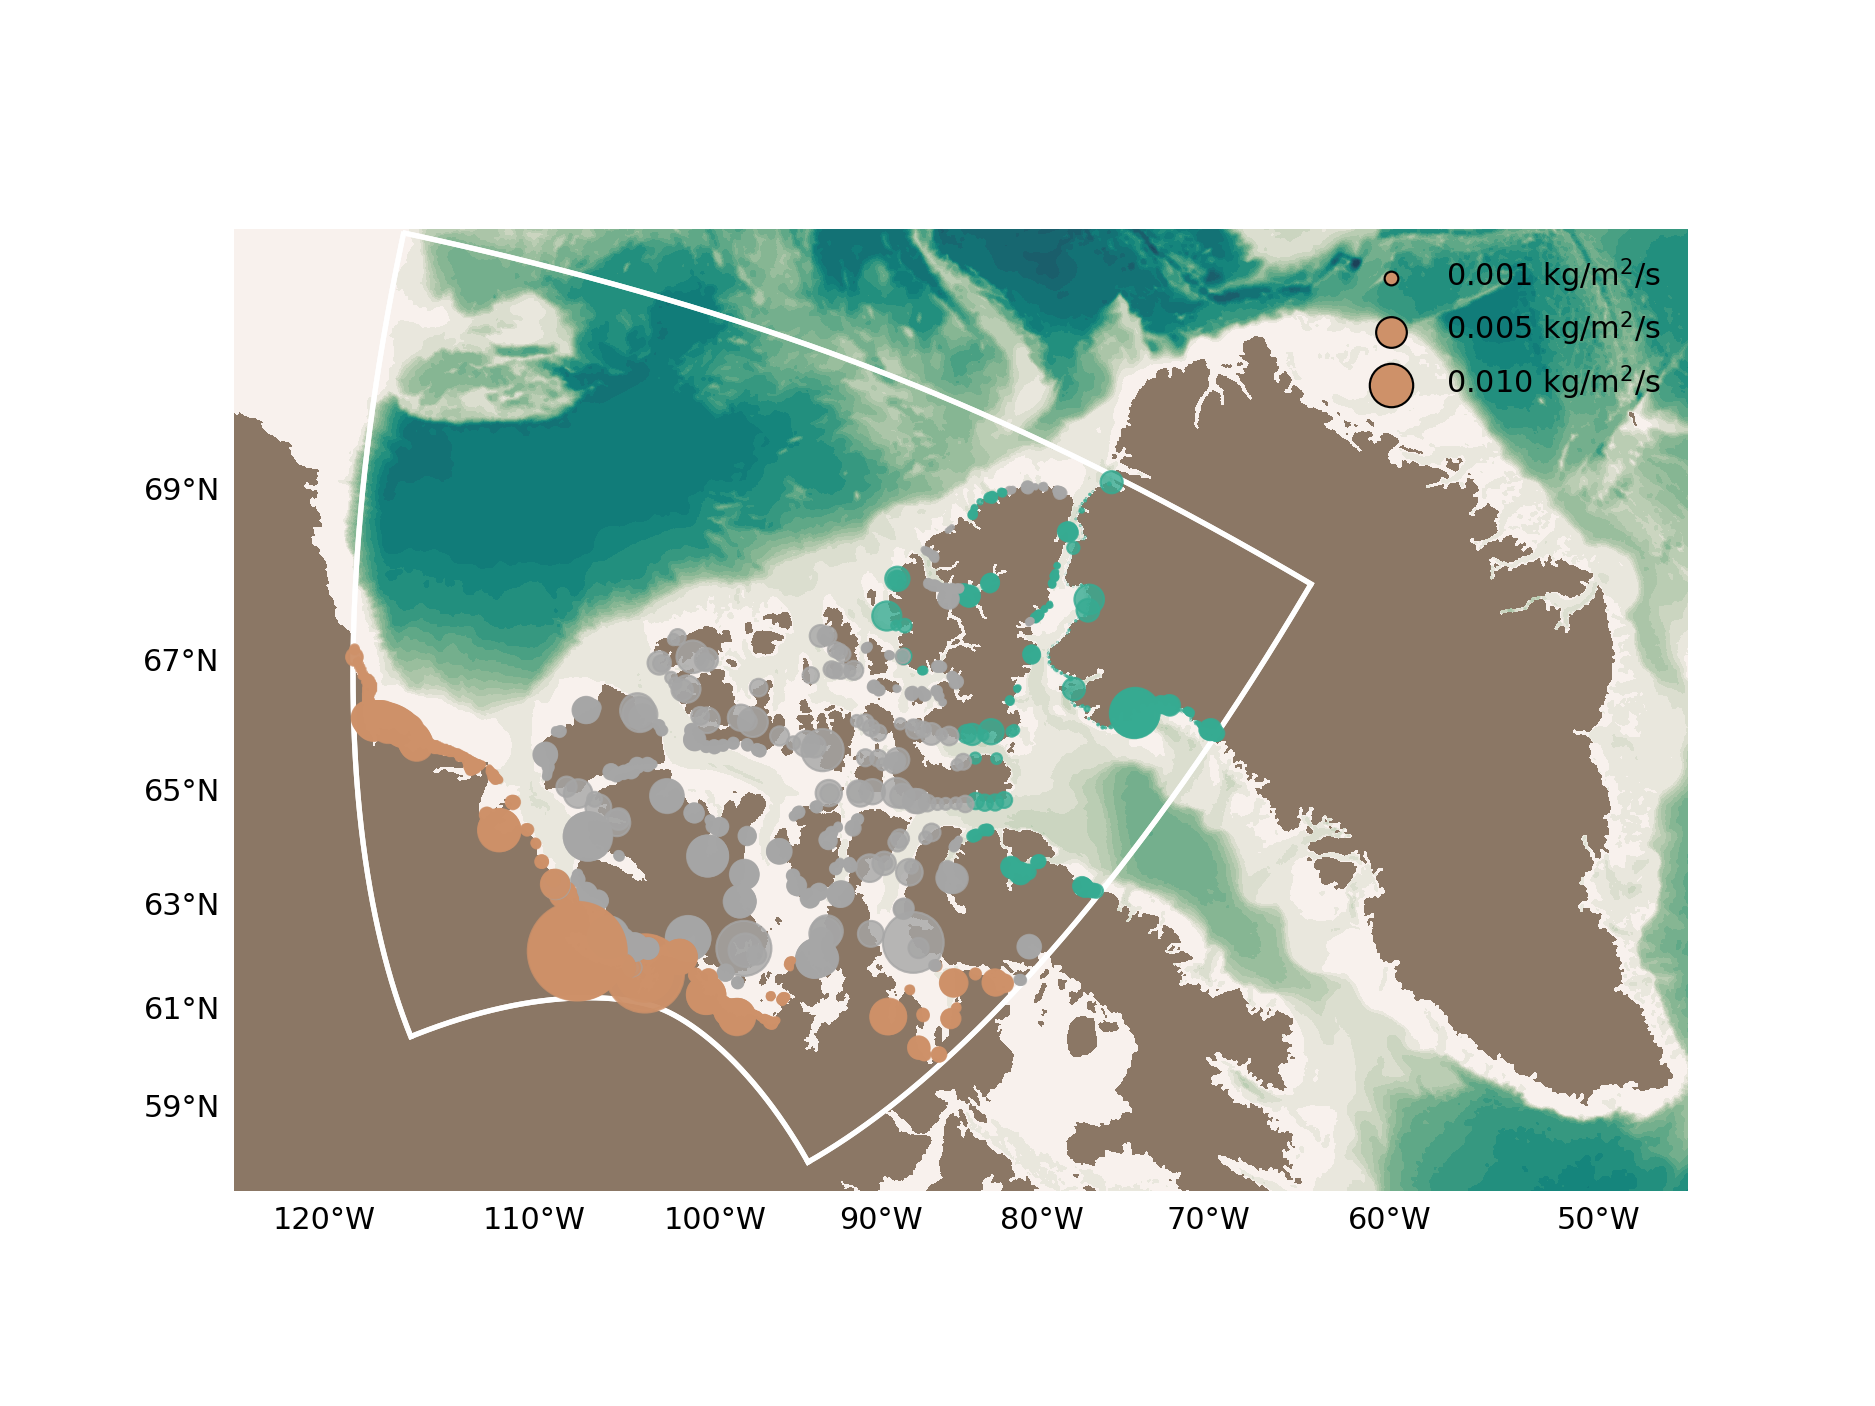

In [12]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(lon, lat) 
x_rf,    y_rf = proj1(lon_rf, lat_rf)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'w-', lw=2.4, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'w-', lw=2.4, zorder=2)

colormap = colors.ListedColormap([c_glacier, c_continent, c_other, c_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=river_class[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*4e4, alpha=0.8, cmap=colormap, zorder=3)

for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c=c_continent, alpha=1, s=float(a)*4e4, label=a + ' kg/m$^2$/s', \
                  edgecolors='k', zorder=4)

ax1.legend(scatterpoints=1, frameon=False, labelspacing=0.5, fontsize=14, loc=1)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/M3-sub-domain.png', bbox_inches='tight', dpi=300)

##### Map without bathymetry background

In [7]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x_rf, y_rf = proj1(lon_rf, lat_rf)

colormap = colors.ListedColormap([c_glacier, c_continent, c_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=river_class[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*8e4, alpha=0.6, cmap=colormap, zorder=3)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'k-.', lw=1.4, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'k-.', lw=1.4, zorder=2)


for a in [0.001, 0.005, 0.010]:
    proj1.scatter([], [], c=c_glacier, alpha=1, s=a*8e4,
                label=str(a) + ' kg/m$^2$/s', edgecolors='w')
ax1.legend(scatterpoints=1, frameon=False, labelspacing=1, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/river-classification.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>

NameError: name 'x_sub' is not defined